### 3. Feature Detection and Description 

- Teams will implement feature detection and description using OpenCV. 
- Teams will select and implement at least two feature detection/description 
algorithms (SIFT, SURF, ORB, or others). 
- A comparison of the chosen algorithms' performance is required in the evaluation. 

- Hints for comparison: 
    - Number of detected features: How many keypoints does each algorithm detect in the same image? More keypoints are not always better, but a sufficient number is required for reliable matching. Students could create a plot of the number of features detected vs frame number. 
    - Matching performance: How many correct matches are found by each algorithm? This can be evaluated by visually inspecting a subset of the matches. Students could visualise the matches using a small number of image pairs (e.g., 5-10 pairs). 
    - Computational speed: How long does each algorithm take to detect and describe features? Students can use Python's time module to measure the execution time for this stage. 
    - Robustness to image transformations: How well do the algorithms perform under different conditions, such as changes in scale, rotation, illumination, and viewpoint? This can be done qualitatively by selecting image pairs with significant viewpoint changes and observing the number of matches. 
    - Qualitative assessment: How well do the features visually correspond between frames? Students can create a montage of a few frames, and the feature matches. 
-  Teams must explain the algorithms' parameters and justify their values. 

### SIFT Algorithm

In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import imageio.v3 as iio


In [2]:
# pip install imageio[ffmpeg]
def load_video_frames(video_path, frame_interval=10, display_frames=True):
    # Load frames from a video file at specified intervals.

    frame_count = 0
    frames = []  # List to store frames for visualization

    try:
        print(f"Opening video file: {video_path}")
        
        # Iterate through frames in the video file
        for frame in iio.imiter(video_path):
            if frame_count % frame_interval == 0:
                frames.append(frame)  # Store frame in list
                
                # Display frame if display_frames is True
                if display_frames:
                    plt.imshow(frame)
                    plt.title(f'Frame {frame_count}')
                    plt.axis('off')
                    plt.show()
                
            frame_count += 1

    except FileNotFoundError:
        print(f"Error: Video file not found at {video_path}")
        return [], 0
    except Exception as e:
        print(f"An error occurred while processing the video: {e}")
        return [], 0

    print(f"\nFinished processing video.")
    print(f"Total frames iterated: {frame_count}")
    
    return frames



In [5]:
def SIFT_Algorithm(frames, pairs):
    # Parameter error handling 
    if len(frames) < 2:
        print("Error: At least two frames are necessary.")
        return
    
    total_pairs = len(frames) - 2
    if pairs > total_pairs:
        print(f"Error: Only {total_pairs} consecutive pairs are available.")
        pairs = total_pairs

    # Initialize SIFT detector - TO TUNE PARAMETERS
    sift = cv2.SIFT_create(nfeatures=3000, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

    # Use pairs of frames
    for idx, i in enumerate(pairs, 1):
        j = i + 1

        # Convert the selected frames to grayscale for SIFT processing
        img1 = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(frames[j], cv2.COLOR_BGR2GRAY)

        # Detect and compute the keypoints 
        keypoints1, _ = sift.detectAndCompute(img1, None)
        keypoints2, _ = sift.detectAndCompute(img2, None)
        
        print(f"\nPair {idx}: Frame {i} and Frame {j}")
        print(f"- Keypoints in Frame {i}: {len(keypoints1)}")
        print(f"- Keypoints in Frame {j}: {len(keypoints2)}")

        # Visualize and plot both frames with keypoints
        img_keypoints1 = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        img_keypoints2 = cv2.drawKeypoints(img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        fig, axes = plt.subplots(1, 2, figsize=(20, 12))
        axes[0].imshow(img_keypoints1, cmap='gray')
        axes[0].set_title(f"Frame {i} Keypoints")
        axes[1].imshow(img_keypoints2, cmap='gray')
        axes[1].set_title(f"Frame {j} Keypoints")
        for ax in axes:
                ax.set_xticks([])
                ax.set_yticks([])
        
        plt.suptitle(f"SIFT Keypoint Comparison: Pair {idx}")
        plt.tight_layout()
        plt.show()


In [4]:
frame_indices = [0, 23, 54, 78, 129, 300, 451]

framePairs = load_video_frames('../videos/livingroom.mp4', frame_interval=1, display_frames=False)
SIFT_Algorithm(framePairs, frame_indices)

frameRobustPairs = load_video_frames('../videos/livingroom.mp4', frame_interval=10, display_frames=False)
#SIFT_Algorithm(frameRobustPairs, frame_indices)

Opening video file: ../videos/livingroom.mp4

Finished processing video.
Total frames iterated: 452


TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
def compare_sift_orb_over_frames(frames):

    if not frames:
        print("No frames provided.")
        return

    sift = cv2.SIFT_create()
    orb = cv2.ORB_create()

    sift_keypoints = []
    sift_times = []

    orb_keypoints = []
    orb_times = []

    for idx, frame in enumerate(frames):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # SIFT
        start = time.time()
        kp_sift, _ = sift.detectAndCompute(gray, None)
        sift_elapsed = time.time() - start
        sift_keypoints.append(len(kp_sift))
        sift_times.append(sift_elapsed)

        # ORB
        start = time.time()
        kp_orb, _ = orb.detectAndCompute(gray, None)
        orb_elapsed = time.time() - start
        orb_keypoints.append(len(kp_orb))
        orb_times.append(orb_elapsed)

    frame_indices = list(range(len(frames)))

    # Plot: Number of features
    plt.figure(figsize=(12, 5))
    plt.plot(frame_indices, sift_keypoints, label='SIFT Keypoints', marker='o')
    plt.plot(frame_indices, orb_keypoints, label='ORB Keypoints', marker='s')
    plt.title("Number of Keypoints Detected per Frame")
    plt.xlabel("Frame Index")
    plt.ylabel("Number of Keypoints")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Computation time
    plt.figure(figsize=(12, 5))
    plt.plot(frame_indices, sift_times, label='SIFT Time (s)', marker='o')
    plt.plot(frame_indices, orb_times, label='ORB Time (s)', marker='s')
    plt.title("Feature Detection Time per Frame")
    plt.xlabel("Frame Index")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

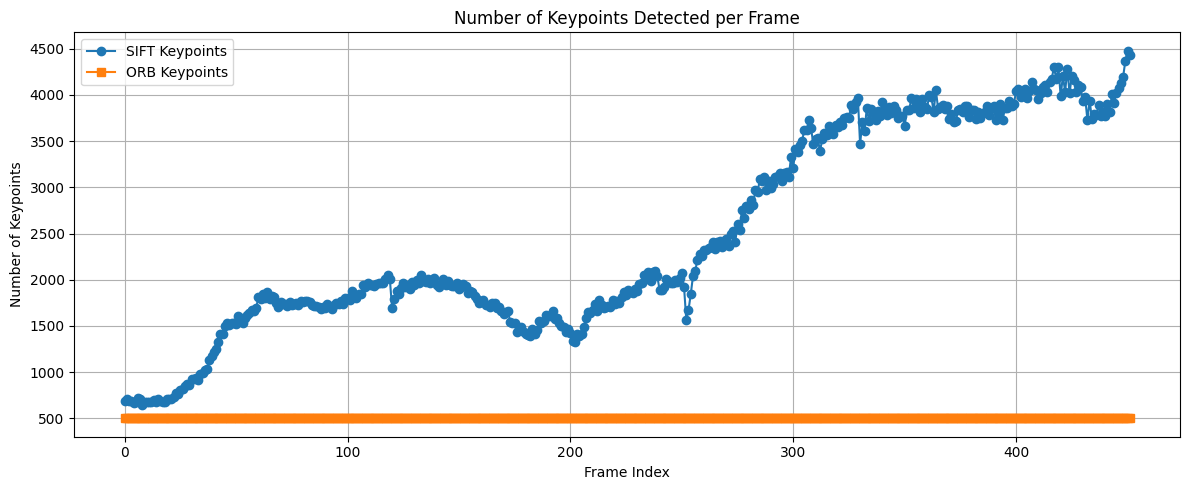

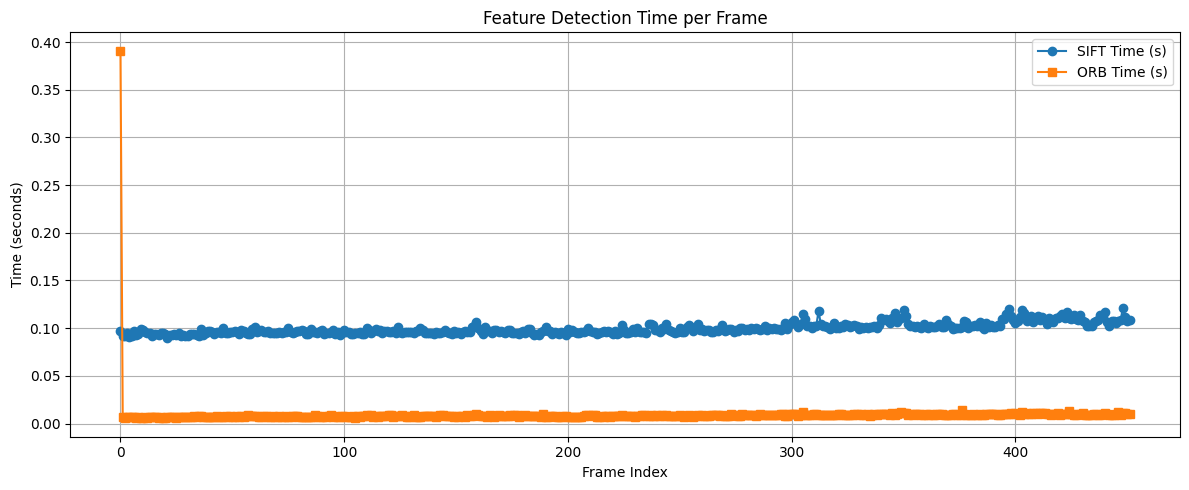

In [ ]:
compare_sift_orb_over_frames(frames)

In [1]:
# FAST algorithm pairs
def FAST_algorithm_pairs(frames, pair_indices):
    
    # Parameter error handling 
    if len(frames) < 2:
        print("Error: At least two frames are necessary.")
        return

    max_index = len(frames) - 2  
    invalid_indices = [i for i in pair_indices if i < 0 or i > max_index]
    if invalid_indices:
        print(f"Error: Invalid indices found: {invalid_indices}. Must be in range 0 to {max_index}.")
        return

    # Initialise FAST algorithm - TO TUNE PARAMETERS
    fast = cv2.FastFeatureDetector_create(threshold=25, nonmaxSuppression=True)

    for idx, i in enumerate(pair_indices, 1):
        j = i + 1

        # Convert the selected frames to grayscale for FAST processing
        img1 = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(frames[j], cv2.COLOR_BGR2GRAY)

        # Detect keypoints
        keypoints1 = fast.detect(img1, None)
        keypoints2 = fast.detect(img2, None)

        print(f"\nPair {idx}: Frame {i} and Frame {j}")
        print(f"- Keypoints in Frame {i}: {len(keypoints1)}")
        print(f"- Keypoints in Frame {j}: {len(keypoints2)}")

        # Visualize and plot both frames with keypoints
        img_keypoints1 = cv2.drawKeypoints(img1, keypoints1, None, color=(0, 255, 0))
        img_keypoints2 = cv2.drawKeypoints(img2, keypoints2, None, color=(0, 255, 0))

        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        axes[0].imshow(img_keypoints1, cmap='gray')
        axes[0].set_title(f"Frame {i}")
        axes[1].imshow(img_keypoints2, cmap='gray')
        axes[1].set_title(f"Frame {j}")

        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.suptitle(f"FAST Keypoint Comparison: Pair {idx}")
        plt.tight_layout()
        plt.show()
